In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import astropy
from astropy.table import Table

In [2]:
def tname(i):
    path = '/home/raulteixeira/repos/CSPZ/scripts/tile_DR3_1_1.csv'
    metadata = np.genfromtxt(path, dtype='str', delimiter=",")[1:][int(i)]
    tilename = metadata[0][2:-1]
    return tilename

DES0717+1834
Z_MEAN


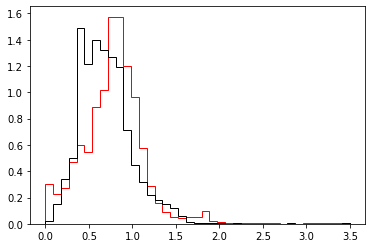

Z_B


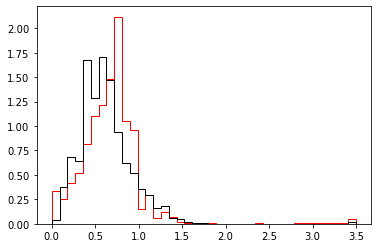

DES0717+1834, templates used [0. 1. 2. 3. 4. 5. 6. 7. 8.]
Z_SAMP


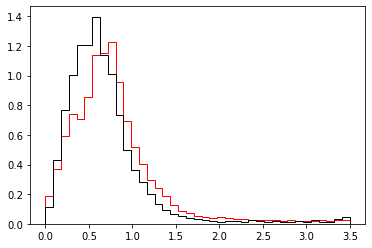

In [5]:
tileno = 2
tilename = tname(tileno)

tilename = tname(tileno)
print(tilename)

bands = ['g', 'r', 'i', 'z']
flag_masks = []
# for band in bands:
#     filename = f'/home/raulteixeira/scratch-midway2/CosmicShearData/tile_{tileno}/decade.ncsa.illinois.edu/\
# deca_archive/DEC_Taiga/multiepoch/delve/r5918/{tname(tileno)}/p01/cat/{tname(tileno)}_r5918p01_{band}_cat.fits'
#     table_band = Table.read(filename)
#     mask_i = table_band['FLAGS']==0
#     flag_masks.append(mask_i)

# maskflag = np.full(mask_i.size, True)
# for i in range(4):
#     maskflag = np.logical_and(maskflag, flag_masks[i])

filename = f'/home/raulteixeira/scratch-midway2/CosmicShearData/tile_{tileno}/pzout_{tileno}.h5'
with h5py.File(filename) as f:
    bpzres={}
    for key in list(f.keys()):
        bpzres[key] = np.array(f[key])

# filename = f'/home/raulteixeira/scratch-midway2/CosmicShearData/tile_{tileno}/table.h5'
# with h5py.File(filename) as f:
#     photometry={}
#     for key in list(f['df'].keys()):
#         photometry[key] = np.array(f['df'][key])

# filename = '/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/pzinput/pzinput_METACAL_4_bands_DES1212-3540.h5'
# with h5py.File(filename) as f:
#     photometry_good={}
#     for key in list(f['df'].keys()):
#         photometry_good[key] = np.array(f['df'][key])

filename = '/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/pzs/pz_hdfn_gen_METACAL4_DES1212-3540_test110822.h5'
with h5py.File(filename) as f:
    bpzgood={}
    for key in list(f.keys()):
        bpzgood[key] = np.array(f[key])

print('Z_MEAN')
plt.hist(bpzres['Z_MEAN'][bpzres['Z_MEAN']>-1], bins=np.linspace(0, 3.5, 40), density=1, histtype='step', color='r');
plt.hist(bpzgood['Z_MEAN'][bpzgood['Z_MEAN']>-1], bins=np.linspace(0, 3.5, 40), density=1, histtype='step', color='k');
plt.show()

print('Z_B')
plt.hist(bpzres['Z_B'][bpzres['Z_B']>-1], bins=np.linspace(0, 3.5, 40), density=1, histtype='step', color='r');
plt.hist(bpzgood['Z_B'][bpzgood['Z_B']>-1], bins=np.linspace(0, 3.5, 40), density=1, histtype='step', color='k');
plt.show()


print(f'{tilename}, templates used', np.unique(bpzres['T_B']))

print('Z_SAMP')
plt.hist(bpzres['Z_SAMP'][bpzres['Z_SAMP']>-1], bins=np.linspace(0, 3.5, 40), density=1, histtype='step', color='r');
plt.hist(bpzgood['Z_SAMP'][bpzgood['Z_SAMP']>-1], bins=np.linspace(0, 3.5, 40), density=1, histtype='step', color='k');
plt.show()

# magdata = photometry['block0_values'].T[8:12]
# magerrdata = photometry['block0_values'].T[12:]

# magdata_good = photometry_good['block1_values'].T[0:4]
# magerrdata_good = photometry_good['block1_values'].T[4:8]

# for i in range(4):
#     plt.hist(magerrdata[i], bins=np.linspace(-1, 1, 50), histtype = 'step', color='r', density=1)
#     plt.hist(magerrdata_good[i], bins=np.linspace(-1, 1, 50), histtype = 'step', color='k', density=1)
#     plt.show()

# maskierr25 = magerrdata[3]<.25

# for i in range(4):
#     plt.hist(magdata[i], bins=np.linspace(18, 28, 50), histtype = 'step', color='r', density=1)
#     plt.hist(magdata_good[i], bins=np.linspace(18, 28, 50), histtype = 'step', color='k', density=1)
#     plt.show()

# for i in range(3):
#     plt.hist(magdata[i]-magdata[i+1], bins=np.linspace(-1, 4, 50), histtype = 'step', color='r', density=1)
#     plt.hist(magdata_good[i]-magdata_good[i+1], bins=np.linspace(-1, 4, 50), histtype = 'step', color='k', density=1)
#     plt.show()



# i_cut_good = magdata_good[3]<23
# for i in range(4):
#     magmask_i = magdata_good[i]!=99
#     plt.hist(magdata_good[i][np.logical_and(i_cut_good, magmask_i)], bins=40, alpha = .25)
# plt.show()

# i_cut = magdata[3]<20
# for i in range(4):
#     magmask_i = magdata[i]!=99
#     plt.hist(magdata[i][np.logical_and(i_cut, magmask_i)], bins=40, alpha = .25)
# plt.show()

#     plt.hist(bpzres['Z_SAMP'][np.logical_and(maskierr25, bpzres['Z_SAMP']>-1)], bins=np.linspace(0, 3.5, 40), density=1, histtype='step', color='r');
#     plt.hist(bpzgood['Z_SAMP'][bpzgood['Z_SAMP']>-1], bins=np.linspace(0, 3.5, 40), density=1, histtype='step', color='k');
#     plt.show()

# np.sum(magdata[i]==99)

# for i in range(4):
#     magmask_i = magdata[i]!=99
#     errmaxmask = magerrdata[i]<28.3
#     plt.hist(magerrdata[i][np.logical_and(magmask_i, errmaxmask)], bins=40, alpha = .25)
# plt.yscale('log')
# plt.show()

# for i in range(4):
#     plt.hist(magerrdata[i], bins=40, alpha = .2)
# print('maskless below')
# plt.yscale('log')
# plt.show()

In [50]:
print(f_obs)

[6.85363988e-10 8.58596749e-10 1.06731746e-09 1.13327570e-09]
